## Bayesian approach

#### Frequentist concerns

- Test power concerns: influenced by threshold, data variance, sample size
- No peeking allowed! The test needs to be run as whole
- P-value can fluctuate as number of samples inceases

#### Ethical dilemma
- Observe that drug is working - should we provide treatment for control group earlier?

#### Bayseian approach

- Adapts as more data comes in
- So no need to worry about ending test early
- Power of tests / sample size / effect size is of no worry
- Shift from reject/ do not reject terminology, confidence interval interpretation
- Instead of rejecting the null hypothesis answer P(A > B)

#### Explore-Exploit dilemma
Casino analogy
Simplification - Win (1) or Lose (0). Two machines to play.
Which machine to play? Hard to tell, since we have no prior knowledge.

I - 0

II - ? 

I - 0 

II - 1 

P(success) = wins/total 

After two trials - P(success I) = 0, P(success II) = 1

These are MLE estimates. Smth wrong?

I - 0 

II - 1, 0

P(success II) = 0.5


I - 0 

II - 1, 0, 0

P(success II) = 1/3

This is `greedy` choice.


I - 0 

II - 1, 0, 0, 0

P(success II) = 1/4

Shall we choose II again?
What can be done against `greedy` search?


##### Statistical peculiarities here
- We should choose how much data to collect before staring the experiment
- Determine the power and effect size. But how is it possible if we didn't play beforehand?
- What if effect size predictions are wrong?
- You still must take experiments to complete

#### Adaptation 
- Use quantitative reasoning and algos to adapt.
   1. Collect more data (exploration)
   2. Select choice with highest winning rate (exploration)
- This is `Explore-Exploit` dilemma

- Epsilon-greedy algorithm
- Optimistic Initial Values
- Upper Confidence Bound 
- Thompson Sampling 

#### Epsilon-greedy algorithm
One of the most practical method for quantitive comparison of things

E.g., two models for measuring density for Reservoir Engineering department. Which one is better?

$ \mu = \bar{x} \pm Z_{\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}$

where

$ \bar{x} $ - point estimate, 

$ Z_{\frac{\alpha}{2}} $ - confidence level,

$ \frac{\sigma}{\sqrt{n}}$ - margin of error

- Infinite number of samples to get an absolute precise estimate of a metric
- More samples leads to interval shrinking

BUT! If we execute suboptimal model a lot of times, we waste resources.

- Need to balance explore/exploit
- Choosing best MLE win rate does not work. This is called greedy.
- Shortsighted, no regards to confidence in prediction or amount of data collected

Name `Epsilog-Greedy` comes from modifying the greedy strategy. Idea: have a small probability of 
doing smth random (non-greedy) with probability $\epsilon$ (0.05, 0.1).


- Exploration with $\epsilon \gg 0$ to collect data about all models.
- When do we have enough data? Is is supoptimal forever?
- E.g. $E(R) = (1-\epsilon)*\alpha + \epsilon*\frac{\alpha+\beta}{2}$ 

#### Decaying epsilon
- $\epsilon(t) \propto 1/t $
- $\epsilon(t) =\epsilon_0 \alpha^t $
- $\epsilon(t) =\frac{a}{\log (bt+c)} $
- etc.

In [26]:
import matplotlib.pyplot as plt
import numpy as np


In [27]:
np.random.uniform(0,1)

0.66811784153234

In [37]:
import numpy as np

class Model:
    def __init__(self, probability, init_mean=0):
        self.probability = probability
        self.mean = init_mean
        if init_mean > 0:
             self.sample_size = 1
        else:
             self.sample_size = 0
    
    def execute(self):
        return np.random.uniform(0,1) < self.probability

    def update(self, x):
        self.sample_size += 1
        self.mean = ((self.sample_size - 1)*self.mean + x) / self.sample_size


def choose_random_argmax(a):
    idx = np.argwhere(np.amax(a) == a).flatten()
    return np.random.choice(idx)


In [53]:
def experiment(model_probs, eps, total=100):
  models = [Model(p, init_mean=0.5) for p in model_probs]
  rewards = np.zeros(total)

  num_times_explored = 0
  num_times_exploited = 0
  num_optimal = 0

  optimal_j = np.argmax([m.probability for m in models])
  print("optimal j:", optimal_j)

  for i in range(total):

    # use epsilon-greedy to select the next bandit
    if np.random.uniform(0,1) < eps:
      num_times_explored += 1
      j = np.random.randint(len(models))
    else:
      num_times_exploited += 1
      j = choose_random_argmax([m.mean for m in models])

    if j == optimal_j:
      num_optimal += 1

    # pull the arm for the bandit with the largest sample
    x = models[j].execute()

    # update rewards log
    rewards[i] = x

    # update the distribution for the bandit whose arm we just pulled
    models[j].update(x)

    

  # print mean estimates for each bandit
  for m in models:
    print("mean estimate:", m.mean)

  # print total reward
  print("total reward earned:", rewards.sum())
  print("overall win rate:", rewards.sum() / total)
  print("num_times_explored:", num_times_explored)
  print("num_times_exploited:", num_times_exploited)
  print("num times selected optimal bandit:", num_optimal)

  # plot the results
  cumulative_rewards = np.cumsum(rewards)
  win_rates = cumulative_rewards / (np.arange(total) + 1)
  plt.plot(win_rates)
  plt.plot(np.ones(total)*np.max(model_probs))
  plt.show()

optimal j: 2
mean estimate: 0.11538461538461539
mean estimate: 0.6176470588235294
mean estimate: 0.7548818088386431
total reward earned: 745.0
overall win rate: 0.0745
num_times_explored: 43
num_times_exploited: 957
num times selected optimal bandit: 972


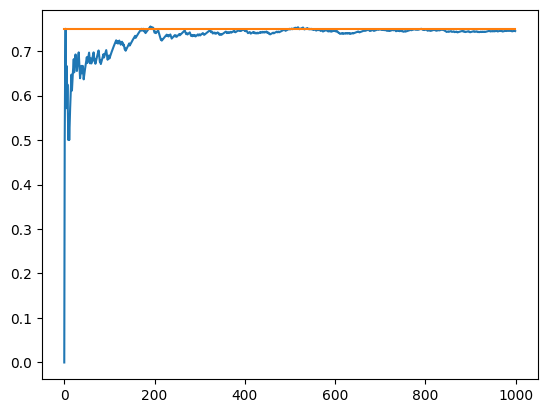

In [55]:
total = 1000
eps = 0.05
model_probs = [0.2, 0.5, 0.75]
experiment(model_probs, eps, total)

### UCB1
Upper Confidence Bound 

1. Epsilong-greedy
2. Optimistic
3. UCB

Markov inequality

